In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [6]:
df = pd.read_csv('/content/Train_data.csv')

In [7]:
print(df.head())

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

In [8]:
print(df.isnull().sum())

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [9]:
X = df.drop(columns=['Disease'])
y = df['Disease']


In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
new_test_df = pd.read_csv('/content/Train_data.csv')

In [15]:
print(new_test_df.isnull().sum())

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [16]:
X_new_test = new_test_df.drop(columns=['Disease'])
y_new_test = new_test_df['Disease']

In [17]:
y_new_test = label_encoder.transform(y_new_test)

In [18]:
# Normalize/scale the new test features using the same scaler fit on training data
X_new_test = scaler.transform(X_new_test)

In [19]:
rf_new_pred = rf_model.predict(X_new_test)
gb_new_pred = gb_model.predict(X_new_test)

In [20]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred, average='macro'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

In [21]:
evaluate_model(y_new_test, rf_new_pred, "Random Forest")

Evaluation Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:
[[623   0   0   0   0]
 [  0 540   0   0   0]
 [  0   0 556   0   0]
 [  0   0   0 509   0]
 [  0   0   0   0 123]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       623
           1       1.00      1.00      1.00       540
           2       1.00      1.00      1.00       556
           3       1.00      1.00      1.00       509
           4       1.00      1.00      1.00       123

    accuracy                           1.00      2351
   macro avg       1.00      1.00      1.00      2351
weighted avg       1.00      1.00      1.00      2351



In [22]:
evaluate_model(y_new_test, gb_new_pred, "Gradient Boosting")

Evaluation Metrics for Gradient Boosting:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:
[[623   0   0   0   0]
 [  0 540   0   0   0]
 [  0   0 556   0   0]
 [  0   0   0 509   0]
 [  0   0   0   0 123]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       623
           1       1.00      1.00      1.00       540
           2       1.00      1.00      1.00       556
           3       1.00      1.00      1.00       509
           4       1.00      1.00      1.00       123

    accuracy                           1.00      2351
   macro avg       1.00      1.00      1.00      2351
weighted avg       1.00      1.00      1.00      2351



In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training data
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Gradient Boosting Cross-Validation Scores:", gb_cv_scores)


Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Gradient Boosting Cross-Validation Scores: [1. 1. 1. 1. 1.]


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0


In [25]:
# Initialize Random Forest model with best parameters
best_rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42)

# Train the model on the full training data
best_rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0


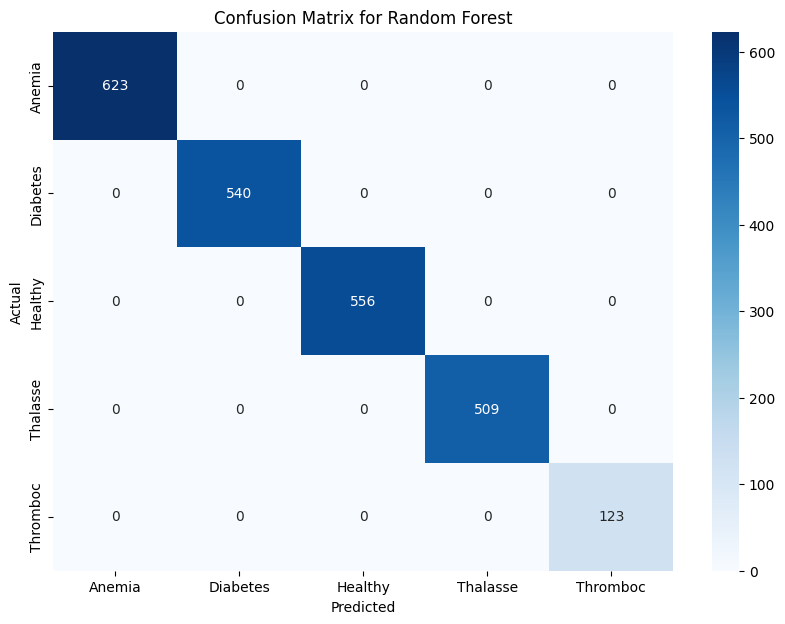

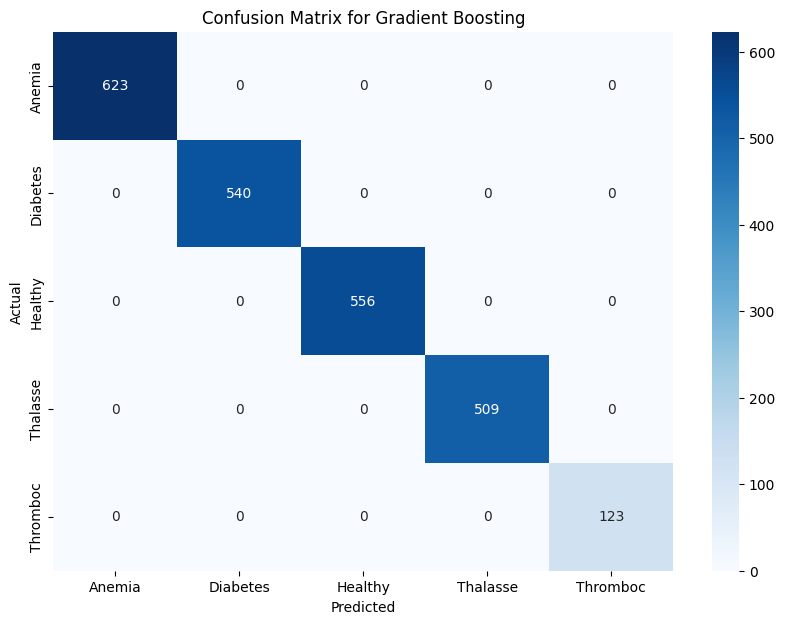

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_new_test, rf_new_pred, "Random Forest")

# Plot confusion matrix for Gradient Boosting
plot_confusion_matrix(y_new_test, gb_new_pred, "Gradient Boosting")


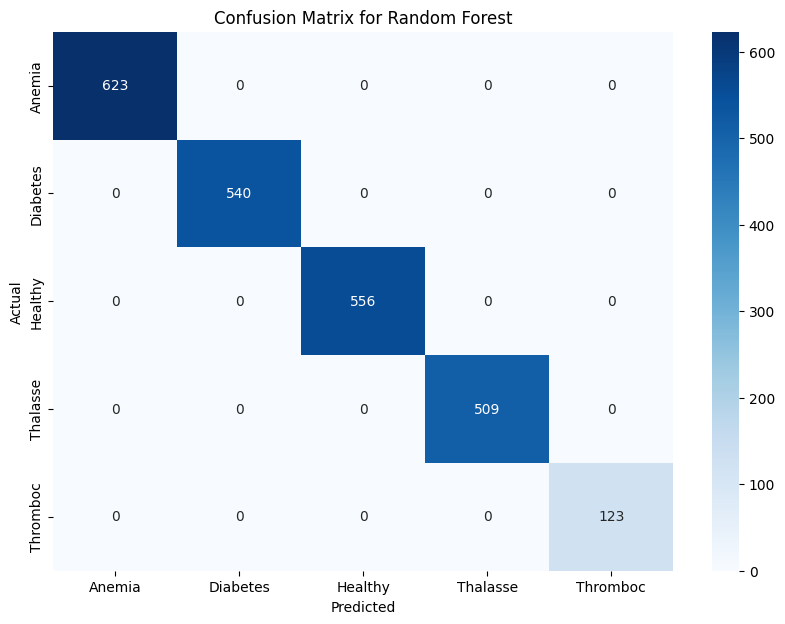

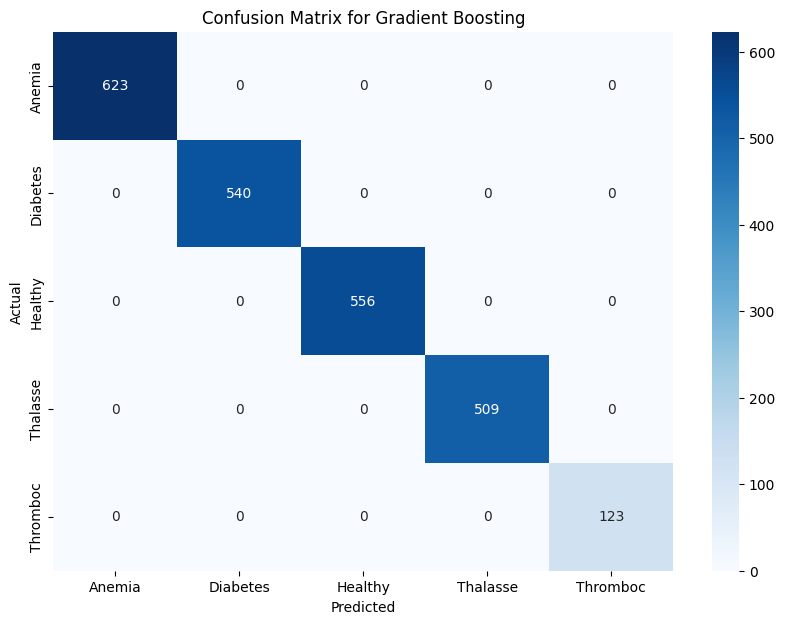

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_new_test, rf_new_pred, "Random Forest")

# Plot confusion matrix for Gradient Boosting
plot_confusion_matrix(y_new_test, gb_new_pred, "Gradient Boosting")
